# Сравнение сортировки Шелла с быстрой сортировкой #
Сортировка Шелла - алгоритм сортировки, являющийся усовершенствованным вариантом сортировки вставками. Идея метода Шелла состоит в сравнении элементов, стоящих не только рядом, но и на определённом расстоянии друг от друга. Иными словами — это сортировка вставками с предварительными «грубыми» проходами.

При сортировке Шелла сначала сравниваются и сортируются между собой значения, стоящие один от другого на некотором расстоянии d. После этого процедура повторяется для некоторых меньших значений d, а завершается сортировка Шелла упорядочиванием элементов при 
d=1 (то есть обычной сортировкой вставками). Эффективность сортировки Шелла в определённых случаях обеспечивается тем, что элементы «быстрее» встают на свои места.

In [16]:
import random
from random import randint
import time
from matplotlib import pylab as plt
import math
%matplotlib inline

In [17]:
def shell(array):
    k = int(math.log2(len(array)))
    interval = 2**k -1
    
    while interval > 0:
        for i in range(interval, len(array)):
            temp = array[i]
            j = i
            
            while j >= interval and array[j - interval] > temp:
                array[j] = array[j - interval]
                j -= interval
                
            array[j] = temp
            
        k -= 1
        interval = 2**k -1
        
    return array     

In [18]:
def quicksort(nums):    
    if len(nums) <= 1:
         return nums
    else:
           q = random.choice(nums)

           less_nums = []
           more_nums = []
           equal_nums = []

           for i in nums:
               if i < q:
                    less_nums.append(i)

               elif i > q:
                    more_nums.append(i)

               else:
                    equal_nums.append(i)

           return quicksort(less_nums) + equal_nums + quicksort(more_nums)

In [19]:
x = [] 
shl = []
qic = []
nums = 10

for i in range(13):
    x.append(nums)
    lst = [randint(0, 100000) for i in range(nums)]
    nums = nums * 2
    
    start = time.time()
    quicksort(lst)
    qic.append(time.time() - start)

nums = 10

for i in range(13):
    lst = [randint(0, 100000) for i in range(nums)]
    nums = nums * 2
    
    start = time.time()
    shell(lst)
    shl.append(time.time() - start)

Ниже приведен график сравнения времени выполнения быстрой сортировки и сортировки Шелла

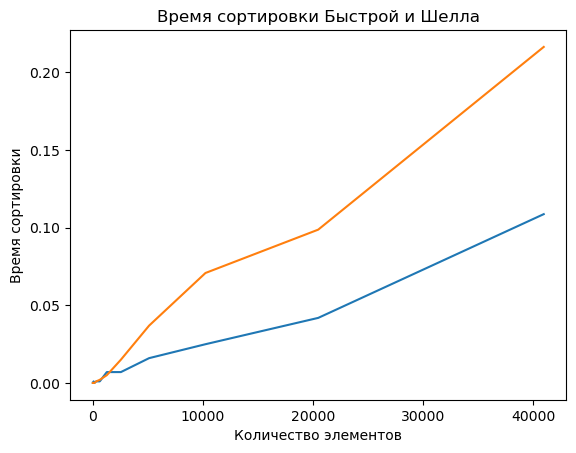

In [21]:
plt.title("Время сортировки Быстрой и Шелла")
plt.xlabel("Количество элементов")
plt.ylabel("Время сортировки")
plt.plot(x, qic, x, shl)
plt.show()

Как видно из графика, быстрая сортировка оказалась быстрее сортировки Шелла. Разница во времени при сортировки 40000 элементов состовляет десятки миллисекунд. Можно сказать что быстрая сортировка в 2 раза быстрее сортировки Шелла. Однако с маленьким количеством сортируемых элементов, алгоритм Шелла не уступает быстрой сортировке.